In [1]:
!wget https://docs.google.com/spreadsheets/d/13Gx_EPrsfIEZoyru0KiM6RLa2XCmsY1i4uES05Ix-wA/export?format=xlsx

--2022-08-08 16:26:06--  https://docs.google.com/spreadsheets/d/13Gx_EPrsfIEZoyru0KiM6RLa2XCmsY1i4uES05Ix-wA/export?format=xlsx
Resolving docs.google.com (docs.google.com)... 108.177.119.101, 108.177.119.100, 108.177.119.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0g-bk-sheets.googleusercontent.com/export/3sm34aofsvmt5ehut1q6bddr3o/ctdo02pn93isfhn21l2c1mh6jc/1659975965000/108941869722513384537/*/13Gx_EPrsfIEZoyru0KiM6RLa2XCmsY1i4uES05Ix-wA?format=xlsx [following]
--2022-08-08 16:26:07--  https://doc-0g-bk-sheets.googleusercontent.com/export/3sm34aofsvmt5ehut1q6bddr3o/ctdo02pn93isfhn21l2c1mh6jc/1659975965000/108941869722513384537/*/13Gx_EPrsfIEZoyru0KiM6RLa2XCmsY1i4uES05Ix-wA?format=xlsx
Resolving doc-0g-bk-sheets.googleusercontent.com (doc-0g-bk-sheets.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0g-bk-sheets.googleu

In [2]:
import os

# Absolute path of a file
old_name = 'export?format=xlsx'
new_name = 'polarities_process.xlsx'

# Renaming the file
os.rename(old_name, new_name)

In [3]:
#Read Excel File
import pandas as pd

df = pd.read_excel('polarities_process.xlsx')
df.head()

,Tweet,Author_name,Score,Scoring String,Negativity,Positivity,Uncovered Tokens,Total Tokens,Sentiment
0,Il mIndiadiadiaistero della Difesa russo negat...,FraLauricella,-0.205128,accuse (-0.21) ha (0.00),0.205128,0.0,44.0,46.0,Negative
1,"Hello world. My name is Lera, Iâ€™m love Ukrai...",kanatonII,-0.800000,love (-0.80),0.800000,0.0,32.0,33.0,Negative
2,"Hello world. My name is Alyona, i'm love Ukrai...",alyonational,-4.320513,love (-0.80) raped (-0.92) killed (-0.90) love...,4.320513,0.0,55.0,60.0,Negative
3,GenocideOflove Ukraines UkraineUnderAttack Ukr...,MPlechiy,-0.900000,genocideoflove (-0.90),0.900000,0.0,27.0,28.0,Negative
4,The price of Russian oil and gas.\nThe price o...,hirraaii,-0.051282,indifference (-0.05),0.051282,0.0,23.0,24.0,Negative


##**Prepare Dataset**

In [4]:
#Randomized The Dataset
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
#Rename target columns elements like negative to 0 and positive to 1
df.loc[df['Sentiment'] == 'Positive', 'Sentiment'] = 1
df.loc[df['Sentiment'] == 'Negative', 'Sentiment'] = 0

In [6]:
#Select Training And Testing Data
train_data = df.drop(['Tweet', 'Author_name', 'Scoring String','Sentiment'], axis=1)
test_data = df[['Sentiment']]

In [7]:
train_data.describe()

,Score,Negativity,Positivity,Uncovered Tokens,Total Tokens
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,-0.226622,0.568244,0.341621,25.072758,27.187739
std,0.845259,0.653272,0.396252,10.143292,10.585229
min,-5.307692,0.000000,0.000000,2.000000,3.000000
25%,-0.800000,0.000000,0.000000,19.000000,21.000000
50%,-0.051282,0.384615,0.307692,22.000000,24.000000
75%,0.384615,0.898077,0.512821,28.000000,30.000000
max,3.256410,5.897436,3.256410,86.000000,89.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             4192 non-null   float64
 1   Negativity        4192 non-null   float64
 2   Positivity        4192 non-null   float64
 3   Uncovered Tokens  4192 non-null   float64
 4   Total Tokens      4192 non-null   float64
dtypes: float64(5)
memory usage: 163.9 KB


In [9]:
#Select The Response and the predictor variables
X = train_data
Y = test_data.astype(int)

In [10]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 16.4 MB/s 
     |████████████████████████████████| 9.8 MB 56.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [11]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
cons = DropConstantFeatures(tol = 1)
cons.fit_transform(X)

# Dropping Duplicate Features 
dup = DropDuplicateFeatures()
X = dup.fit_transform(X)

q_cons = DropConstantFeatures(tol = 0.99)
X = q_cons.fit_transform(X)

X.shape

(4192, 5)

In [12]:
# Split the given dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##**Predict Label**

In [14]:
def predict_label(model, sample):
  row = sample.reshape(1,-1)
  res = (model.predict(row)).round()
  if res == 1:
    print('Tweet Sentiment Is Positive')
  else:
    print('Tweet Sentiment Is Negative')

##**Random Forest Classifier**

In [ ]:
#Import required libraries
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,classification_report, roc_auc_score

In [ ]:
# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=1, n_jobs=-1, class_weight={0:1, 1:25}, criterion='gini', max_depth= 6, min_samples_split= 12, n_estimators= 400, warm_start=True)
RFC.fit(X_train, y_train.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=6,
                       min_samples_split=12, n_estimators=400, n_jobs=-1,
                       random_state=1, warm_start=True)

In [ ]:
# Predicting the test set results
y_Pred = RFC.predict(X_test)

In [ ]:
# Finding out the total accuracy of model
acc = accuracy_score(y_test, y_Pred)
acc*100

100.0

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       1.00      1.00      1.00       629

    accuracy                           1.00      1258
   macro avg       1.00      1.00      1.00      1258
weighted avg       1.00      1.00      1.00      1258



In [ ]:
# Testing
sample = X_train[0]
predict_label(RFC, sample)


Tweet Sentiment Is Negative


##**Support Vector Machine (SVM)**

In [ ]:
# Import The Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.utils.np_utils import to_categorical

In [ ]:
#Standardized with Label Encoder
label_enc = LabelEncoder()
y_train_svm = label_enc.fit_transform(y_train)
y_test_svm = label_enc.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train SVM Classifier by keeping decision function shape as one vs all
SVM_classifier = SVC(decision_function_shape='ovr')
SVM_classifier.fit(X_train, y_train_svm)

SVC()

In [ ]:
y_pred = SVM_classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test_svm,y_pred)
accuracy*100

99.60254372019078

In [ ]:
# Classification Report
c_report = classification_report(y_pred, y_test_svm)
print(c_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       624
           1       1.00      0.99      1.00       634

    accuracy                           1.00      1258
   macro avg       1.00      1.00      1.00      1258
weighted avg       1.00      1.00      1.00      1258



In [ ]:
# Testing
sample = X_train[0]
predict_label(SVM_classifier,sample)

Tweet Sentiment Is Negative


## **Decision tree Classifier**

In [18]:
# Import The Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from keras.utils.np_utils import to_categorical

In [17]:
#Standardized with Label Encoder
label_enc = LabelEncoder()
y_train_dt = label_enc.fit_transform(y_train)
y_test_dt = label_enc.fit_transform(y_test)

NameError: ignored

In [ ]:
dec_tree= DecisionTreeClassifier(max_depth=10)
dec_tree.fit(X_train,y_train_dt)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = dec_tree.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test_dt,y_pred)
accuracy*100

100.0

In [16]:
# Classification Report
c_report = classification_report(y_pred, y_test_dt)
print(c_report)

NameError: ignored

In [15]:
# Testing
sample = X_train[0]
predict_label(dec_tree,sample)

NameError: ignored

##**Generalized Linear Model**

In [ ]:
# Import The Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
from keras.utils.np_utils import to_categorical
from sklearn import linear_model

In [ ]:
#Standardized with Label Encoder
label_enc = LabelEncoder()
y_train_ld = label_enc.fit_transform(y_train)
y_test_ld = label_enc.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = linear_model.LinearRegression()

In [ ]:
clf.fit (X_train, y_train_ld) 

LinearRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred = (np.round(y_pred)).astype(int)
y_pred[y_pred < 0] = 0
y_pred[y_pred > 1] = 1
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test_ld,y_pred)
accuracy*100

97.77424483306835

In [ ]:
# Classification Report
c_report = classification_report(y_pred, y_test_ld)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       601
           1       1.00      0.96      0.98       657

    accuracy                           0.98      1258
   macro avg       0.98      0.98      0.98      1258
weighted avg       0.98      0.98      0.98      1258



In [ ]:
# Testing
sample = X_train[0]
predict_label(clf,sample)

Tweet Sentiment Is Negative


##**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth = 2, random_state = 0)

In [ ]:
gb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=20,
                           random_state=0)

In [ ]:
y_pred = gb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

100.0

In [ ]:
# Classification Report
c_report = classification_report(y_pred, y_test)
print(c_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       1.00      1.00      1.00       629

    accuracy                           1.00      1258
   macro avg       1.00      1.00      1.00      1258
weighted avg       1.00      1.00      1.00      1258



In [ ]:
# Testing
sample = X_train[0]
predict_label(gb,sample)

Tweet Sentiment Is Negative


##**Naive Bayes Classification**

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn import metrics

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

98.48966613672496

In [ ]:
# Classification Report
c_report = classification_report(y_pred, y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       610
           1       1.00      0.97      0.99       648

    accuracy                           0.98      1258
   macro avg       0.98      0.99      0.98      1258
weighted avg       0.99      0.98      0.98      1258



In [ ]:
# Testing
sample = X_train[0]
predict_label(gnb,sample)

Tweet Sentiment Is Negative


#**Classification With Deep Learning**

In [19]:
from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense

In [28]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
     Dense(64, activation='relu'),
     Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9836
Epoch 2/50
294/294 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9939
Epoch 3/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 4/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 5/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 6/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.9993
Epoch 7/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9973
Epoch 8/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 9/50
294/294 [==============================] - 0s 1ms/step - loss: 6.9553e-04 - accuracy: 1.0000
Epoch 10/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.

In [31]:
#accuracy
(model.evaluate(X_test, y_test)[1])*100

40/40 [==============================] - 0s 2ms/step - loss: 5.0919e-04 - accuracy: 1.0000


100.0

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

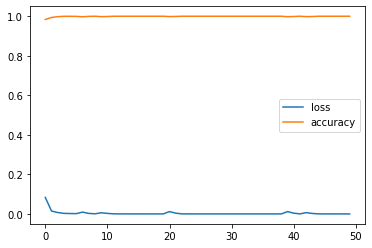

In [33]:
pd.DataFrame(history.history).plot()

In [34]:
from sklearn.metrics import classification_report
predIdxs = model.predict(X_test)
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(y_test, predIdxs))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       632
           1       0.00      0.00      0.00       626

    accuracy                           0.50      1258
   macro avg       0.25      0.50      0.33      1258
weighted avg       0.25      0.50      0.34      1258



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Testing
sample = X_train[0]
predict_label(model, sample)

Tweet Sentiment Is Positive
